# London Underground Exit Data Analysis

## Summary

The aim of this report is to analyse the available data for passenger exits on the London underground, and answer the following questions:
 1. What proportion of exits occur during the morning and evening peaks for all underground stations?

 2. Based on the available data, which stations can be categorised as Work, Residential, or Other?
 
 3. Is the above classification as expected for a select few stations on the Northern line?

The report is divided into 4 sections:

 1. Section 1: Introduction<br>
     1. Snapshot of the original dataset
     1. Exit counts for peak hours
 
 2. Section 2: Peak Proportions Analysis<br>
     1. Modifying the dataset
     1. Summary statistics and plot analysis
     
 3. Section 3: Classification<br>
     1. Morning vs evening exits for individual stations
     1. Rules for categorisation
     1. Evaluation of key stations on Northern Line
     
 4. Section 4: Conclusion
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Section 1: Introduction

This report uses a dataset from 2017 on exits from the London underground stations. The data was generated by Transport for London and relates to a week day. The day of the week is not specified except that it is not Saturday or Sunday. The precise data gathering process is not known but we assume they mainly used data from the automatic ticket barrier, supplemented by counts taken by staff. 

The report builds upon a previous report (ref: notebook2-v3.ipynb) which showed the distribution of the exit times to be bi-modal, i.e, two peaks were observed: one in the morning (H07, H08, H09) and one in the evening (H16, H17, H18). This report will create a new dataset from the original dataset by focussing on these two peaks.

#### Section 1.1: Snapshot of the original dataset

The original dataset for hourly exits on the underground is shown below:

In [2]:
exits = pd.read_csv('hourlyExits.csv',index_col='Station')
exits

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


#### Section 1.2: Exit counts for peak hours

From the above original dataset, a new dataframe called <i>peak_counts</i> is created which shows the total no. of exits for each station during the morning peak (hours 7, 8, and 9), and evening peak (hours 16, 17, and 18).

In [3]:
am_peak, pm_peak = ['H07', 'H08', 'H09'], ['H16', 'H17', 'H18']
peak_counts = pd.DataFrame().assign(AM_peak = exits.loc[:,am_peak].apply(sum, axis = 1), PM_peak = exits.loc[:,pm_peak].apply(sum, axis = 1))
peak_counts

,AM_peak,PM_peak
Station,,
Acton Town,1970,2628
Aldgate,7408,2992
Aldgate East,7618,3803
Alperton,856,1847
Amersham,424,1465
...,...,...
Wimbledon Park,497,1114
Wood Green,2165,6494
Wood Lane,1798,1766


### Section 2: Peak Proportions Analysis

#### Section 2.1: Modifying the dataset

The above dataframe (in Section 1.2) is modified to include the total daily exits for each station (for all hours), and the morning and evening exits (AM_peak_prop) and (PM_peak_prop) as a proportion (percentage) of the total exits.

In [4]:
peak_counts = peak_counts.assign(Total_daily_exits = exits.apply(sum, axis=1))
peak_counts = peak_counts.assign(AM_peak_prop = 100 * peak_counts.AM_peak/peak_counts.Total_daily_exits, PM_peak_prop = 100* peak_counts.PM_peak/peak_counts.Total_daily_exits).round(2)
peak_counts

,AM_peak,PM_peak,Total_daily_exits,AM_peak_prop,PM_peak_prop
Station,,,,,
Acton Town,1970,2628,9362,21.04,28.07
Aldgate,7408,2992,16136,45.91,18.54
Aldgate East,7618,3803,21206,35.92,17.93
Alperton,856,1847,5118,16.73,36.09
Amersham,424,1465,3905,10.86,37.52
...,...,...,...,...,...
Wimbledon Park,497,1114,3296,15.08,33.80
Wood Green,2165,6494,18989,11.40,34.20
Wood Lane,1798,1766,6610,27.20,26.72


#### Section 2.2: Summary Statistics and plot analysis

The distributions of the AM_peak_prop, and the PM_peak_prop columns (morning and evening peak proportions of total daily exits for each station) have the following characteristics:

In [5]:
print(peak_counts.AM_peak_prop.describe(),peak_counts.PM_peak_prop.describe())

count    268.000000
mean      20.712799
std       12.216077
min        4.530000
25%       11.612500
50%       16.940000
75%       26.645000
max       63.040000
Name: AM_peak_prop, dtype: float64 count    268.000000
mean      29.875112
std        8.772510
min        8.460000
25%       24.097500
50%       30.735000
75%       36.160000
max       49.610000
Name: PM_peak_prop, dtype: float64


Plotting the distributions as histograms, it can be seen that both AM_peak_prop and PM_peak_prop appear to be uni-modal distributions with AM_peak_prop having a positive skew, and PM_peak_prop having a negative skew. The median morning peak proportion is 16.9%, and the median evening peak proportion is 30.74%, implying that a typical station is likely to experience a higher proportion of exits in the evening compared to morning. This is reasonable because there are only a few popular financial/ economic hubs (most likely close to the stations that are experiencing more than 50% of their total exits in the morning peak) where people from all over London (and beyond) travel to for work. Therefore, more stations will experience a higher proportion of exits in the evening when everyone is returning home from work. The inter-quartile range for both peaks are 15.03% and 12.06% respectively. The max values are 63.04% for the morning peak and 49.61% for the evening peak. The long right tail on the AM_peak_prop histogram shows how there are a few stations that have a really high proportion of their daily exits in the morning.

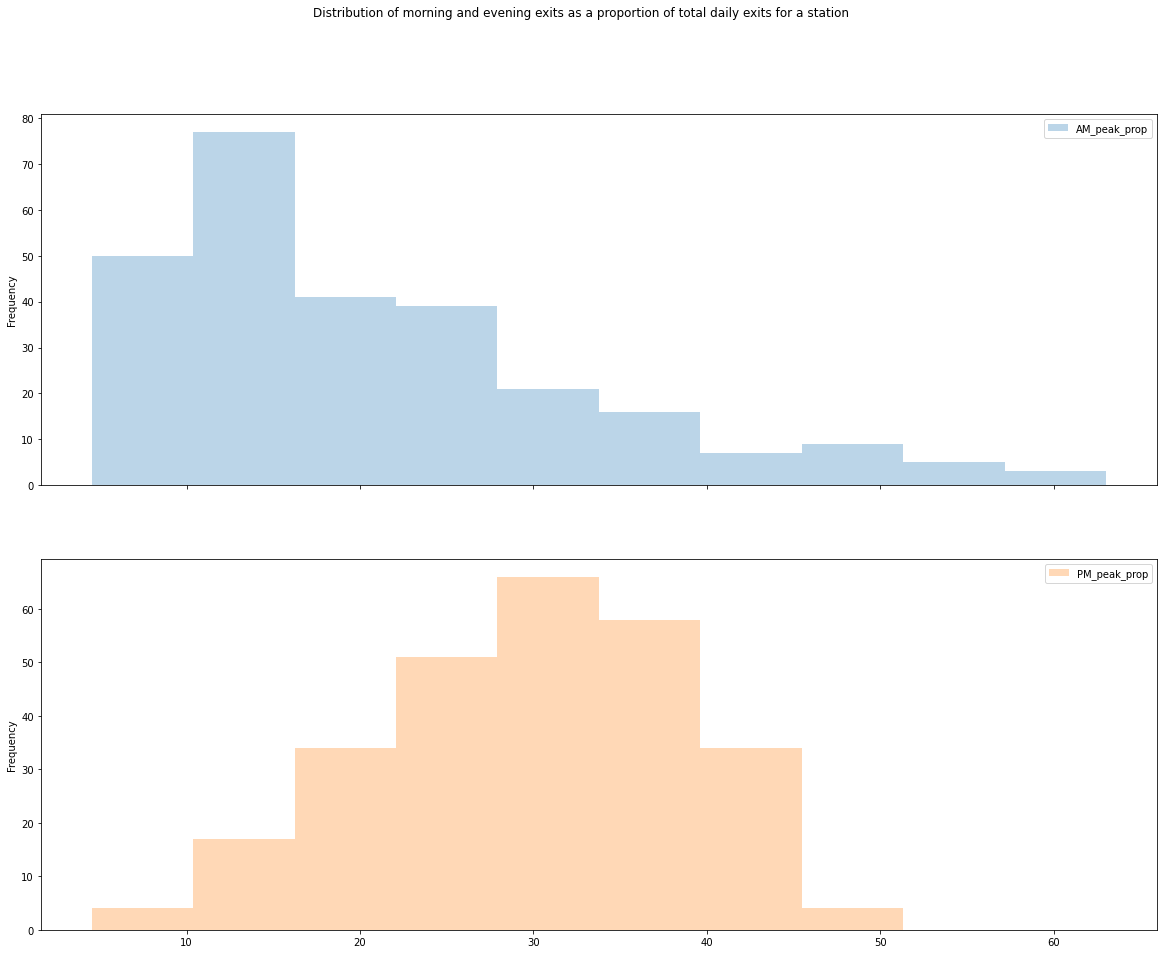

In [6]:
axes = peak_counts.plot(kind = 'hist', subplots = True, layout = (2,1), figsize = (20,15), alpha = 0.3, y = ['AM_peak_prop', 'PM_peak_prop'], sharex = True, log= False, bins = 10,\
                       xlabel = 'Percentage of total exits', title = 'Distribution of morning and evening exits as a proportion of total daily exits for a station')

### Section 3: Classification

#### Section 3.1: Morning vs evening exits for individual stations
The analysis carried out so far doesn't provide any insight into individual stations' peak time exits. This section will aim to do so by adding a column (Total_peak_exits) in the above dataframe for the total number of exits during peak hours (morning and evening) for each station. Another column (AM_exits_percent) is then created that shows the percentage of exits in the morning for each station as a proportion of the total peak exits, as opposed to a proportion of all daily exits. This provides an easy method of comparing the morning and evening peak exits for any given station.

As such, a new dataframe <i> peak_proportions </i> is created from <i> peak_counts </i> with the new columns Total_peak_exits and AM_exits_percent: 

In [7]:
peak_proportions = peak_counts.assign(Total_peak_exits = peak_counts.AM_peak + peak_counts.PM_peak)
peak_proportions = peak_proportions.assign(AM_exits_percent = 100 * peak_proportions.AM_peak/peak_proportions.Total_peak_exits).round(2)
peak_proportions

,AM_peak,PM_peak,Total_daily_exits,AM_peak_prop,PM_peak_prop,Total_peak_exits,AM_exits_percent
Station,,,,,,,
Acton Town,1970,2628,9362,21.04,28.07,4598,42.84
Aldgate,7408,2992,16136,45.91,18.54,10400,71.23
Aldgate East,7618,3803,21206,35.92,17.93,11421,66.70
Alperton,856,1847,5118,16.73,36.09,2703,31.67
Amersham,424,1465,3905,10.86,37.52,1889,22.45
...,...,...,...,...,...,...,...
Wimbledon Park,497,1114,3296,15.08,33.80,1611,30.85
Wood Green,2165,6494,18989,11.40,34.20,8659,25.00
Wood Lane,1798,1766,6610,27.20,26.72,3564,50.45


Plotting the distribution for this new column results in:

count    268.000000
mean      39.613918
std       18.994423
min        9.800000
25%       24.675000
50%       35.720000
75%       51.232500
max       87.990000
Name: AM_exits_percent, dtype: float64

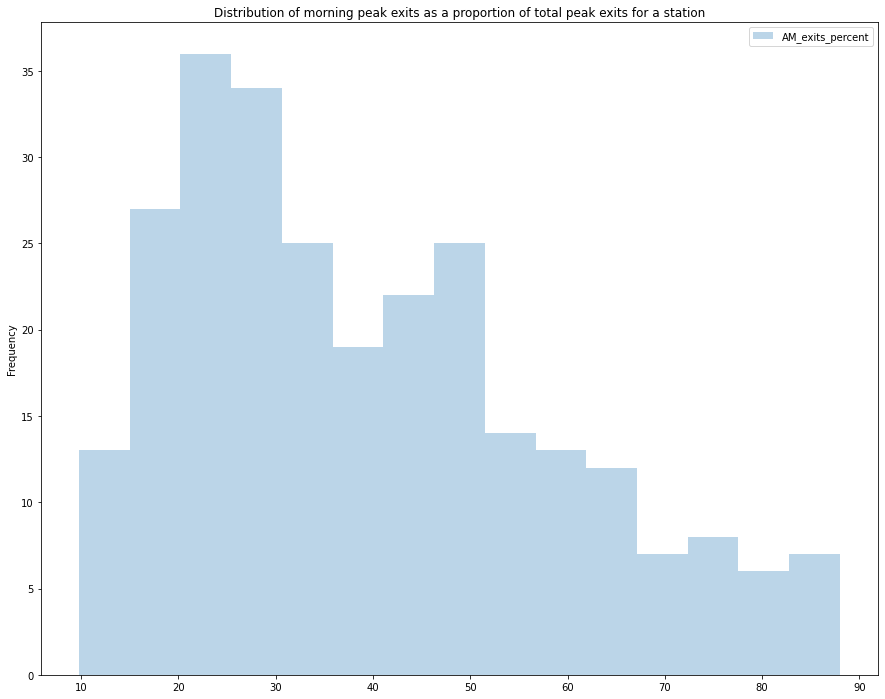

In [8]:
peak_proportions.plot(kind = 'hist', figsize = (15,12), alpha = 0.3, y = ['AM_exits_percent'], bins = 15, title \
                      = 'Distribution of morning peak exits as a proportion of total peak exits for a station')
peak_proportions.AM_exits_percent.describe()

It can be seen from the above histogram that more stations experience a higher proportion of exits during the evening peak compared to the morning peak, reaffirming our observation in Section 2.2 regarding the probable travel patterns of Londoners.
#### Section 3.2: Rules for categorisation

With the above data showing us how the peak exits for individual stations split between morning and evening, rules need to be defined to be able to classify the stations as one of the following:
- Work
- Residential
- Other

To classify a station as 'Work', the proportion of exits in the morning must be significantly higher than the proportion of exits in the evening for a given station. Similarly, to a classify a station as 'Residential', the proportion of exits in the evening must be significantly higher than the proportion of exits in the morning. Where the difference is not that significant, the station can be classified as 'Other'. Looking at the above histogram, the value of 60% was chosen as the point where a station becomes significant enough to classify as 'Work' or 'Residential'. This means that any stations with AM_exits_percent value less than 40% (>60% evening peak exits), will be classed as 'Residential', more than 60% will be classed as 'Work', and between 40% and 60% will be classed as 'Other'. A snapshot of the resulting dataframe is shown below:

In [9]:
def classify(row):
    sig_val = 60 #significant value (percent of total peak exits for a station that classifies the station as work or residential)
    if (row >= (100-sig_val)) and (row <= sig_val): return 'Other'
    if (row > sig_val): return 'Work'
    if (row < (100 - sig_val)): return 'Residential'

peak_proportions = peak_proportions.assign(Category = peak_proportions.AM_exits_percent.apply(classify))
peak_proportions

,AM_peak,PM_peak,Total_daily_exits,AM_peak_prop,PM_peak_prop,Total_peak_exits,AM_exits_percent,Category
Station,,,,,,,,
Acton Town,1970,2628,9362,21.04,28.07,4598,42.84,Other
Aldgate,7408,2992,16136,45.91,18.54,10400,71.23,Work
Aldgate East,7618,3803,21206,35.92,17.93,11421,66.70,Work
Alperton,856,1847,5118,16.73,36.09,2703,31.67,Residential
Amersham,424,1465,3905,10.86,37.52,1889,22.45,Residential
...,...,...,...,...,...,...,...,...
Wimbledon Park,497,1114,3296,15.08,33.80,1611,30.85,Residential
Wood Green,2165,6494,18989,11.40,34.20,8659,25.00,Residential
Wood Lane,1798,1766,6610,27.20,26.72,3564,50.45,Other


Plotting this as a pie chart:

array([[<AxesSubplot:ylabel='Category'>],
       [<AxesSubplot:>]], dtype=object)

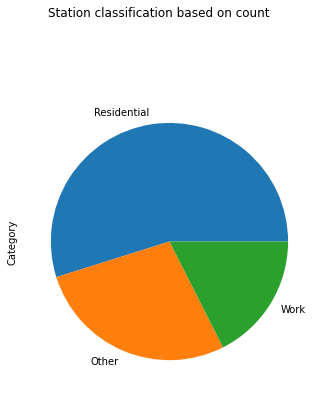

In [10]:
peak_proportions.Category.value_counts().plot.pie(figsize = (12,12), subplots = True, layout = (2,1), title = 'Station classification based on count')

#### Section 3.3: Evaluation of key stations on the Northern Line

Based on the above rule of classification, the following train stations on the northern line were categorised as: 

In [11]:
areas_of_interest = ['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet', 'Leicester Square',
'Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street']

peak_proportions.loc[areas_of_interest, 'Category']

Station
Archway                 Residential
Balham                  Residential
Embankment                    Other
Goodge Street                  Work
Highgate                Residential
High Barnet             Residential
Leicester Square              Other
Morden                  Residential
South Wimbledon         Residential
Tottenham Court Road           Work
Warren Street                  Work
Name: Category, dtype: object

Comparing the above result to the map of the London underground provides some confidence in the rule of classification applied here, as areas like Morden, South Wimbledon, High Barnet etc. are all on the outskirts of London (at the ends of the Northern line), and they have been classed as 'Residential'. Similarly, stations like Goodge Street, Tottenham Court Road, and Warren Street, all in central London have been classed as 'Work'. While it may seem surprising that Embankment and Leicester square have been classed as 'Other', even though they are in Central London and hence one would expect them to be classed as 'Work', it is important to note that they are also popular tourist/evening destinations for entertainment and recreation. In addition, as mentioned in Section 1, this dataset is from an unknown weekday in 2017, and could possibly be from a Friday which will explain the proportions of exits being fairly equal to class these specific stations as 'Other'.

### Section 4: Conclusion

The London underground exit data was analysed and evaluated to ultimately classify stations into 'Work', 'Residential', and 'Other' categories based on the total number of exits they experienced during peak hours in the morning and evening for a particular day. It is recommended that more data from different days is collected and analysed to be able to confidently categorise the stations as needed. In addition, a better classification method is recommended to ascertain whether a station's exits during the morning peak is statistically different from its evening peak.